# Building dataframe


Import needed library for learning model

In [147]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import matplotlib.ticker as mtick

Build dataframe for training set

In [341]:
data = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\TKUD_Projects\\heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Data Analysis 

## Check collumns and shapes in dataframe

In [225]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [226]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 315252 rows and 11 columns


## Describe some basic statistical values

In [227]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Handle missing value 

Get all columns that have missing values

In [265]:
data.columns[data.isna().any()].tolist()

[]

## Handling outliers

We need to find all the columns that could contain outliers

In [266]:
data.select_dtypes(include=['int', 'float']).columns.tolist()


['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [268]:
train_outliers = data.filter( ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'],axis=1)

We will remove all rows that contain outliers

In [269]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe.loc[(data[col] < range_low) | (data[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in BMI is : 10139
NUmber of outliers in PhysicalHealth is : 45517
NUmber of outliers in MentalHealth is : 50142
NUmber of outliers in SleepTime is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

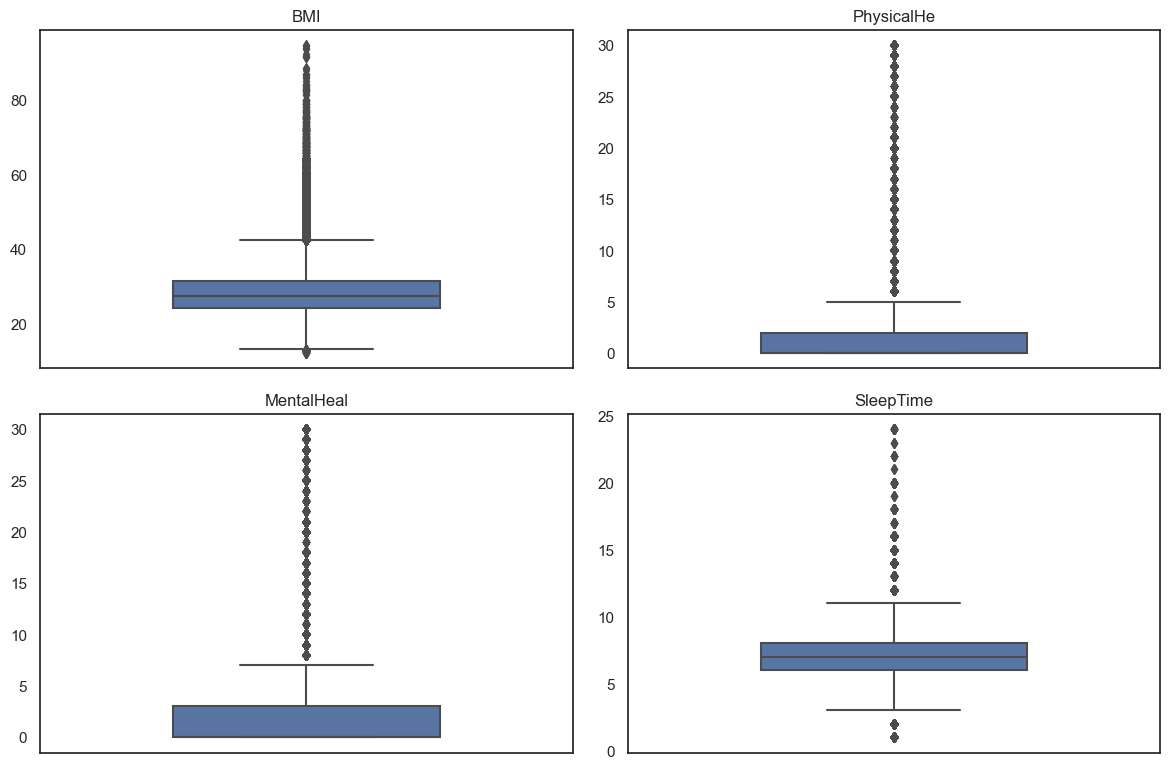

In [270]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(train_outliers):
    sns.boxplot(y=data[col], whis=1.5, width=0.5, orient='v', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].set_title(col[:10])

plt.tight_layout(pad=1.5)
plt.show()

Replace all outliers

In [271]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    data = data[(data[col] >= range_low) & (data[col] <= range_high)]
    outliers = data[(data[col] < range_low) | (data[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in BMI is : 0
NUmber of outliers in PhysicalHealth is : 0
NUmber of outliers in MentalHealth is : 0
NUmber of outliers in SleepTime is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart after replaced all outliers

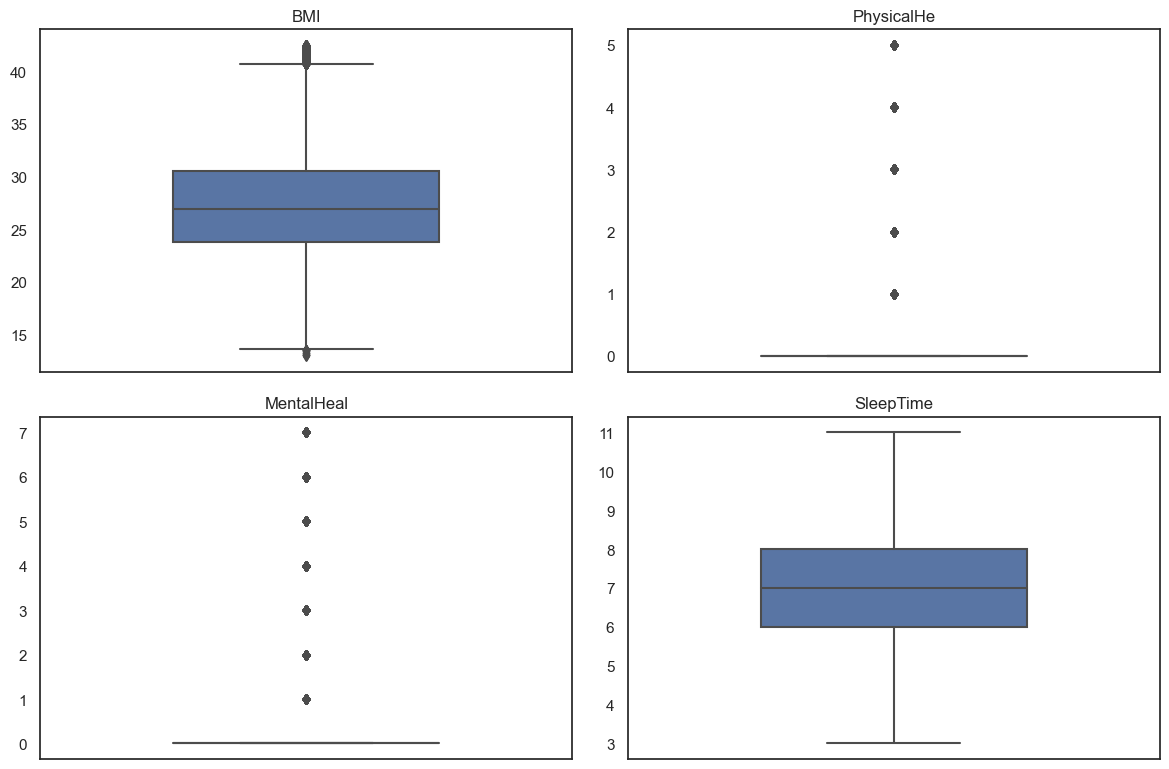

In [272]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(train_outliers):
    sns.boxplot(y=data[col], whis=1.5, width=0.5, orient='v', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].set_title(col[:10])

plt.tight_layout(pad=1.5)
plt.show()

Checking the data after removing outliers

In [273]:
data.shape

(231020, 18)

## Encoding labels

Get all columns that contain object-type values

In [274]:
encoding_col = data.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231020 entries, 1 to 319792
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      231020 non-null  object
 1   Smoking           231020 non-null  object
 2   AlcoholDrinking   231020 non-null  object
 3   Stroke            231020 non-null  object
 4   DiffWalking       231020 non-null  object
 5   Sex               231020 non-null  object
 6   AgeCategory       231020 non-null  object
 7   Race              231020 non-null  object
 8   Diabetic          231020 non-null  object
 9   PhysicalActivity  231020 non-null  object
 10  GenHealth         231020 non-null  object
 11  Asthma            231020 non-null  object
 12  KidneyDisease     231020 non-null  object
 13  SkinCancer        231020 non-null  object
dtypes: object(14)
memory usage: 26.4+ MB


Encoding all object-type then recheck

In [275]:
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    data[col] = le.transform(encoding_col[col].astype(str))



In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231020 entries, 1 to 319792
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      231020 non-null  int32  
 1   BMI               231020 non-null  float64
 2   Smoking           231020 non-null  int32  
 3   AlcoholDrinking   231020 non-null  int32  
 4   Stroke            231020 non-null  int32  
 5   PhysicalHealth    231020 non-null  float64
 6   MentalHealth      231020 non-null  float64
 7   DiffWalking       231020 non-null  int32  
 8   Sex               231020 non-null  int32  
 9   AgeCategory       231020 non-null  int32  
 10  Race              231020 non-null  int32  
 11  Diabetic          231020 non-null  int32  
 12  PhysicalActivity  231020 non-null  int32  
 13  GenHealth         231020 non-null  int32  
 14  SleepTime         231020 non-null  float64
 15  Asthma            231020 non-null  int32  
 16  KidneyDisease     231020 

## Choose appopriate columns

Fetching heatmap figure

Text(0.5, 1.0, 'Correlation between the columns')

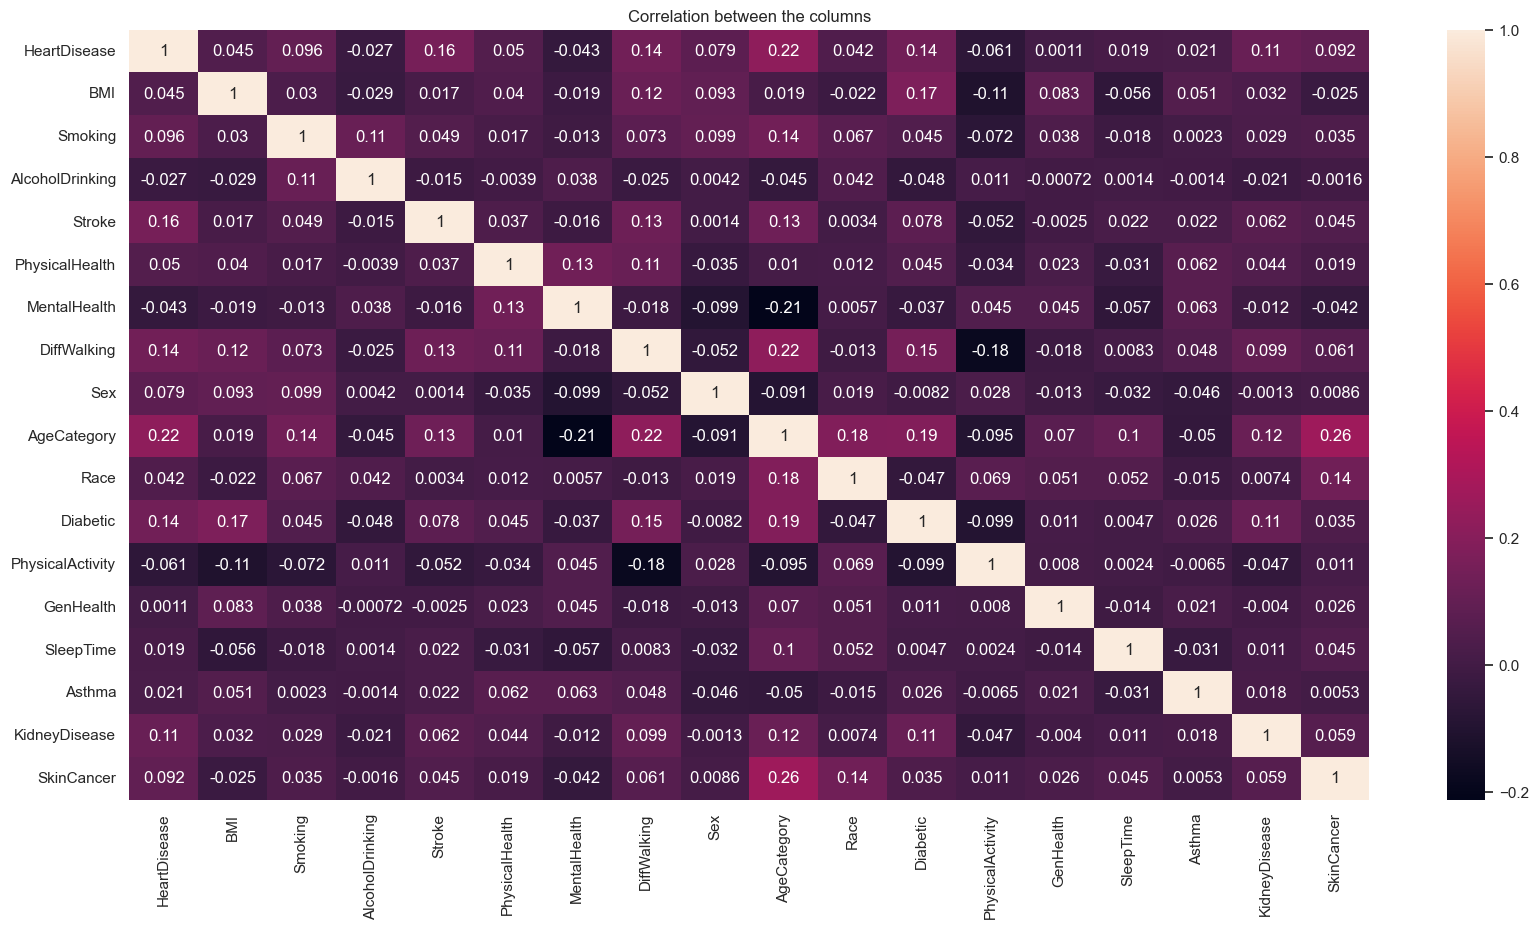

In [277]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation between the columns")

In [278]:
corr_matrix = data.corr()['HeartDisease']

Get top 15 features that will be used for the regressions models

In [279]:
top_15_cols = corr_matrix.abs().nlargest(16).iloc[1:].index

In [280]:
print(top_15_cols)

Index(['AgeCategory', 'Stroke', 'Diabetic', 'DiffWalking', 'KidneyDisease',
       'Smoking', 'SkinCancer', 'Sex', 'PhysicalActivity', 'PhysicalHealth',
       'BMI', 'MentalHealth', 'Race', 'AlcoholDrinking', 'Asthma'],
      dtype='object')


In [281]:
other_cols = [col for col in data.columns if col not in top_15_cols and col != "HeartDisease"]
print(other_cols)

['GenHealth', 'SleepTime']


In [157]:
#y = dataframe['HeartDisease'].values

In [158]:
#dataframe = dataframe.drop(columns=dataframe.columns.difference(top_10_cols))
#dataframe['HeartDisease'] = y

In [159]:
#dataframe.columns

# Analysis

In [60]:
ana_data = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\TKUD_Projects\\heart_2020_cleaned.csv')
ana_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Describe and analysis dataframe based on Gender

In [3]:
cat_cols = ana_data.select_dtypes('object').columns

In [4]:
list_col_cat = list(cat_cols)
list_col_cat

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [5]:
list_col_cat = [element for element in list_col_cat if element not in ['Sex','AgeCategory','Race']]

In [ ]:
list_col_cat = [element for element in list_col_cat if element in top_15_cols and element not in ['Sex','AgeCategory','Race'] ]

In [287]:
sex_gp = ana_data.groupby('Sex')['Race'].value_counts(normalize=True)*100

In [288]:
data_sex_gp = pd.DataFrame(sex_gp)
data_sex_gp.rename(columns={"Race":"Percentage"},inplace=True)

In [289]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

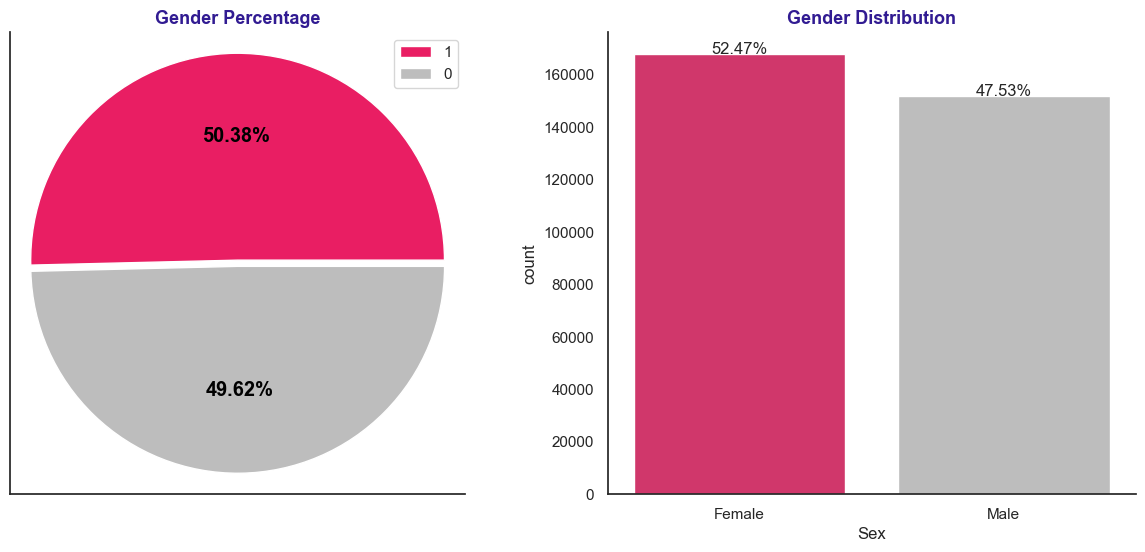

In [290]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), squeeze=True)

# Set the style to white
sns.set(style='white')

# Gender Percentage Pie Chart
ser = (data['Sex'].value_counts(normalize=True) * 100)
ser.plot(kind='pie', autopct='%.2f%%', textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'},
         colors=['#E91E63', '#BDBDBD'], explode=[0.01, 0.02], frame=True, ax=axs[0], labels=None)
axs[0].legend(ser.index)
axs[0].set_ylabel('')
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].set_title('Gender Percentage', fontsize=13, fontweight='bold', loc='center', fontdict={'color': '#311B92'})
sns.despine()

# Gender Distribution Countplot
sns.countplot(data=ana_data, x='Sex', palette=['#E91E63', '#BDBDBD'], ax=axs[1])
axs[1].set_title('Gender Distribution', fontsize=13, fontweight='bold', loc='center',
                 fontdict={'color': '#311B92'})
percentage = list(ana_data['Sex'].value_counts(normalize=True).values * 100)
patches = axs[1].patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() + 0.05
    axs[1].annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

sns.despine()

In [291]:
print(list_col_cat)

['Stroke', 'Diabetic', 'DiffWalking', 'KidneyDisease', 'Smoking', 'SkinCancer', 'PhysicalActivity', 'PhysicalHealth', 'BMI', 'MentalHealth', 'AlcoholDrinking', 'Asthma']


Smoking
AlcoholDrinking
Stroke
DiffWalking
Diabetic
PhysicalActivity
Asthma
KidneyDisease
SkinCancer


Text(0.5, 0.98, 'Details with respect to gender')

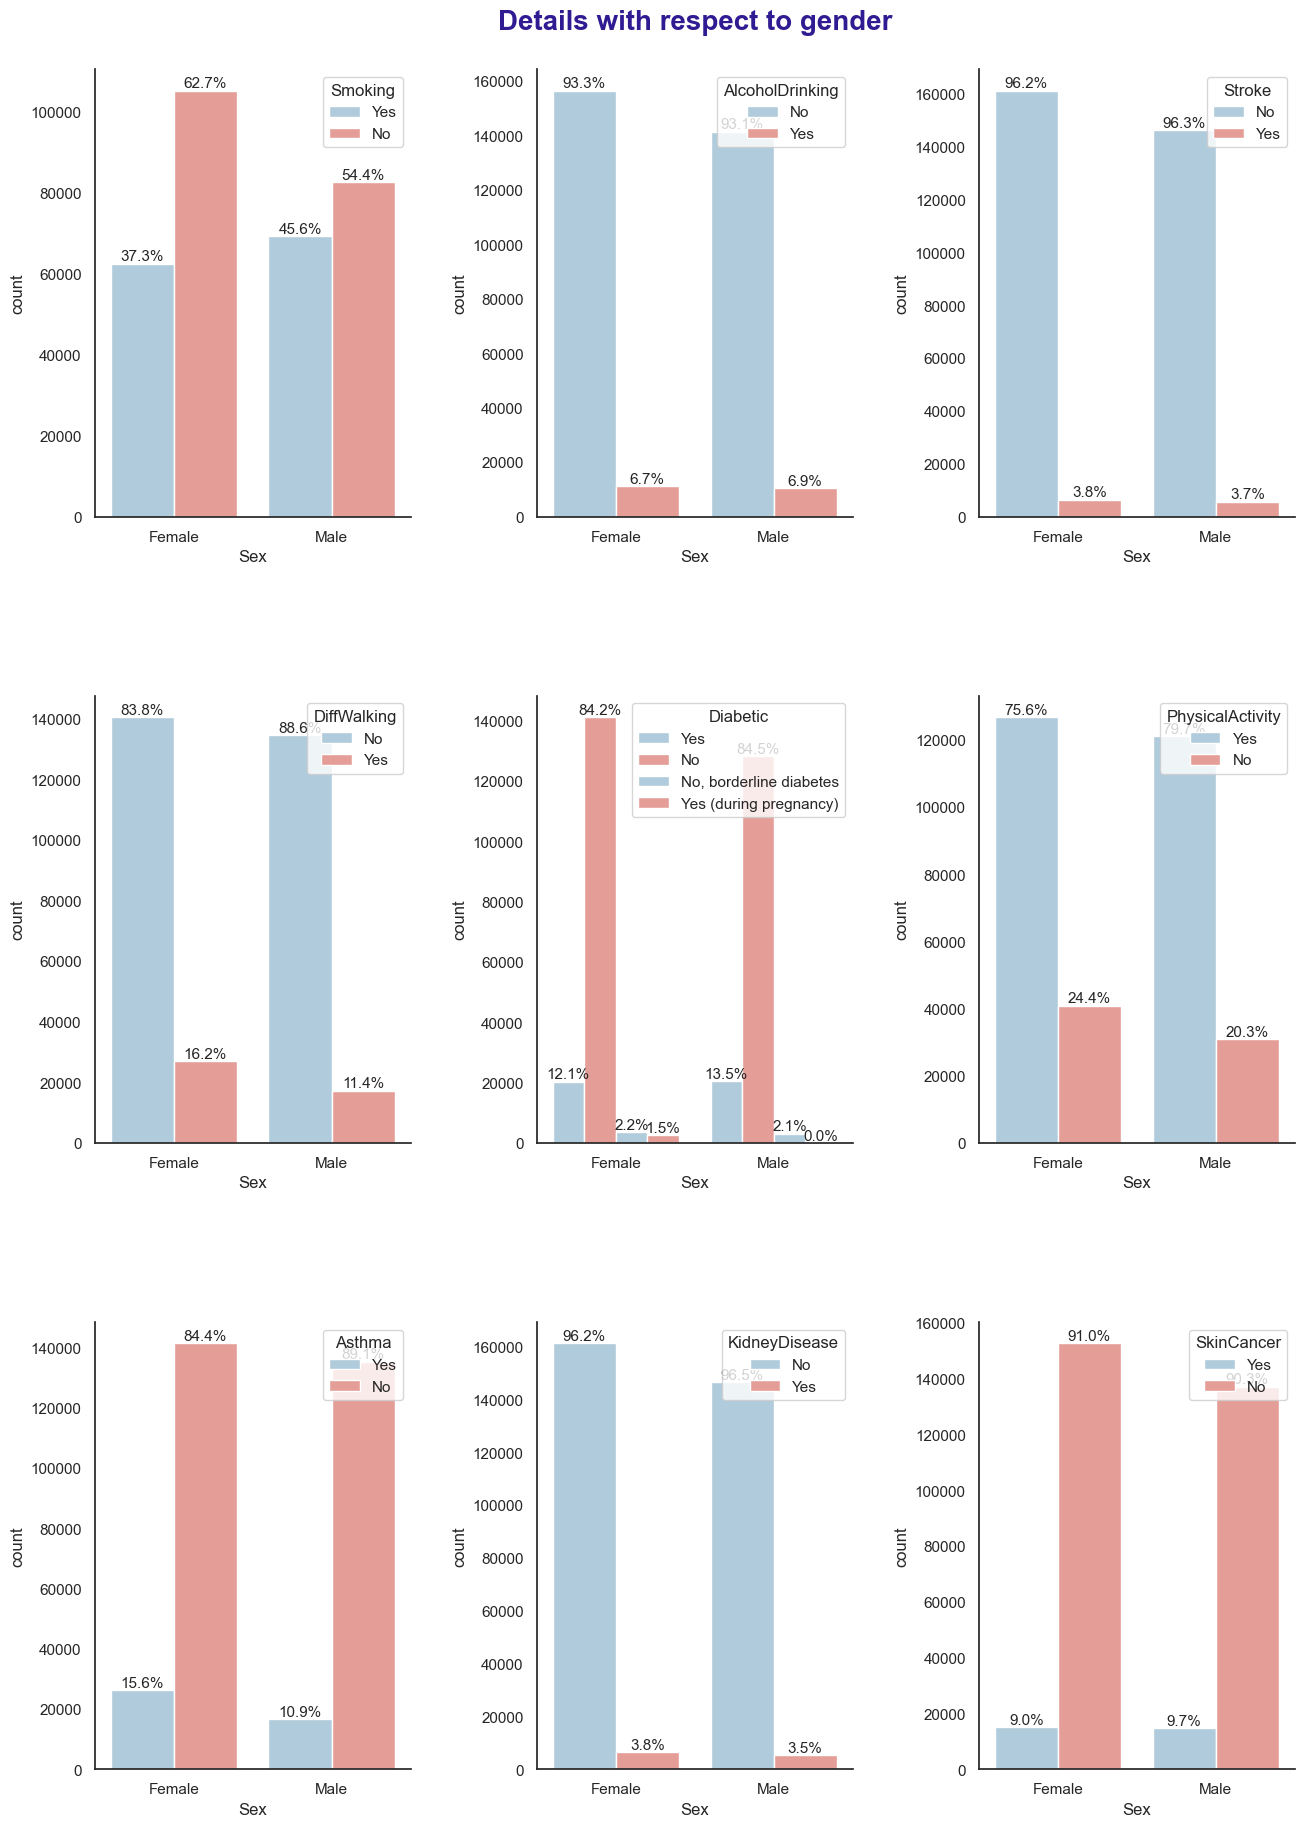

In [311]:
# Display the figure
plt.show()

# Additional code snippets
fig, axs = plt.subplots(3, 3, figsize=(15, 20), squeeze=False)
sns.set(style='white')
for axis, cat in zip(axs.ravel(), list_col_cat):
    ax = sns.countplot(x='Sex', hue=cat, data=ana_data, ax=axis, palette=['#A9CCE3', '#F1948A'])
    percentage_above_bar_relative_to_xgroup(ax)
    ax.legend(title=str(cat), loc='best')
    print(cat)
    sns.despine()

"""plt.figure(figsize=(10, 4))
ax = sns.barplot(x=data_sex_gp['Sex'], y=data_sex_gp['Percentage'], hue=data_sex_gp['Race'], palette='husl')
percentage_above_bar_relative_to_xgroup(ax)
ax.legend(loc='best')
sns.despine()"""

fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.95,
                    wspace=0.4,
                    hspace=0.4)

fig.suptitle('Details with respect to gender', fontweight='bold', fontdict={'color': '#311B92'}, fontsize=20)

#fig.show()

# Asthma

## Impact by Age

In [73]:
ana_data['AgeCategory'] = ana_data['AgeCategory'].replace('80 or older','80<=')

In [74]:
ser=ana_data['AgeCategory'].value_counts()

In [75]:
age_dist = pd.DataFrame(ser)

In [76]:
age_dist['percentage'] = age_dist['count'].apply(lambda x: round((x/age_dist['count'].sum())*100),2)

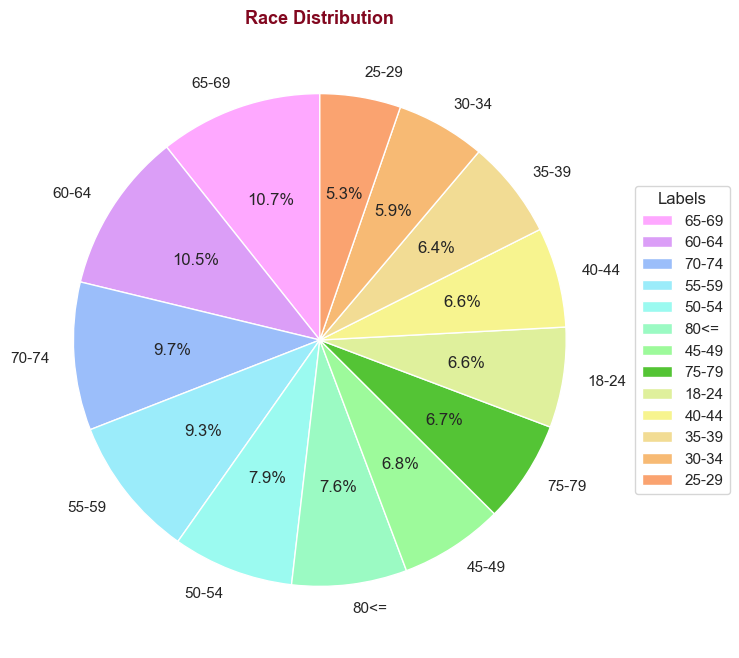

In [178]:
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(age_dist['count'], labels=age_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('Race Distribution' ,loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(age_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

In [61]:
def set_per_given_axis_total(ax,total):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

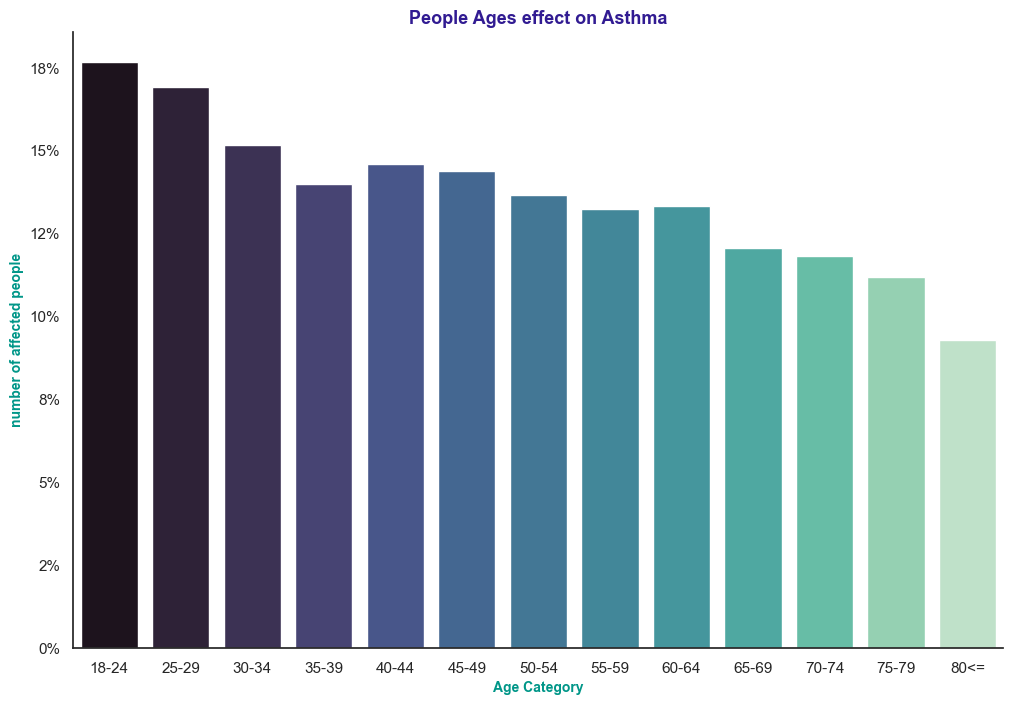

In [150]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['Asthma']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People Ages effect on Asthma', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Age Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of affected people', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by race

In [107]:
ana_data['Race']

0            White
1            White
2            White
3            White
4            White
            ...   
319790    Hispanic
319791    Hispanic
319792    Hispanic
319793    Hispanic
319794    Hispanic
Name: Race, Length: 319795, dtype: object

In [108]:
race_cnt=ana_data['Race'].value_counts()

In [109]:
race_dist = pd.DataFrame(race_cnt)

In [110]:
race_dist['percentage'] = race_dist['count'].apply(lambda x: round((x/race_dist['count'].sum())*100),2)

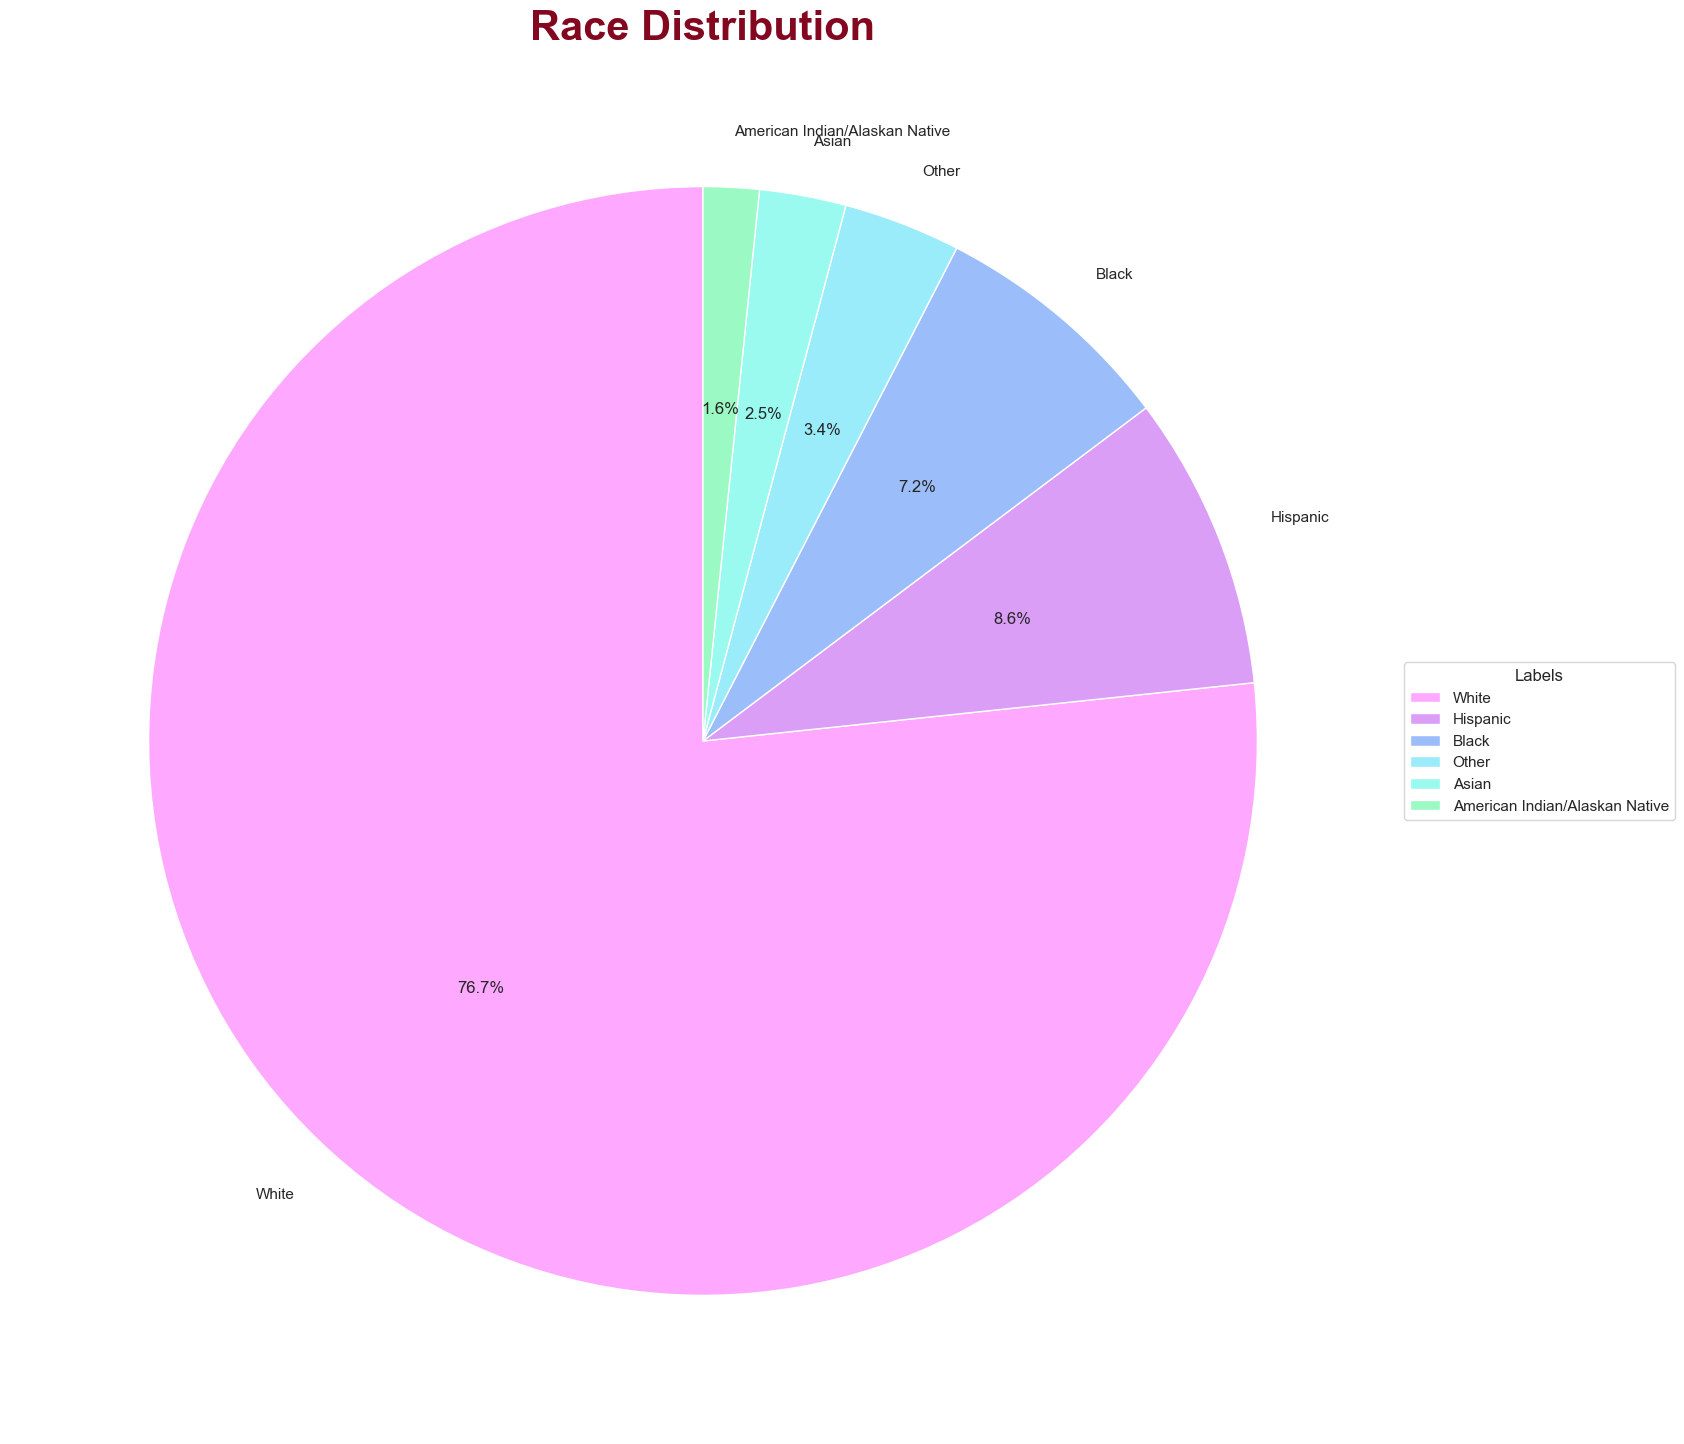

In [179]:
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(18,18))
ax.pie(race_dist['count'], labels=race_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('Race Distribution' ,loc='center', fontsize=30, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(race_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

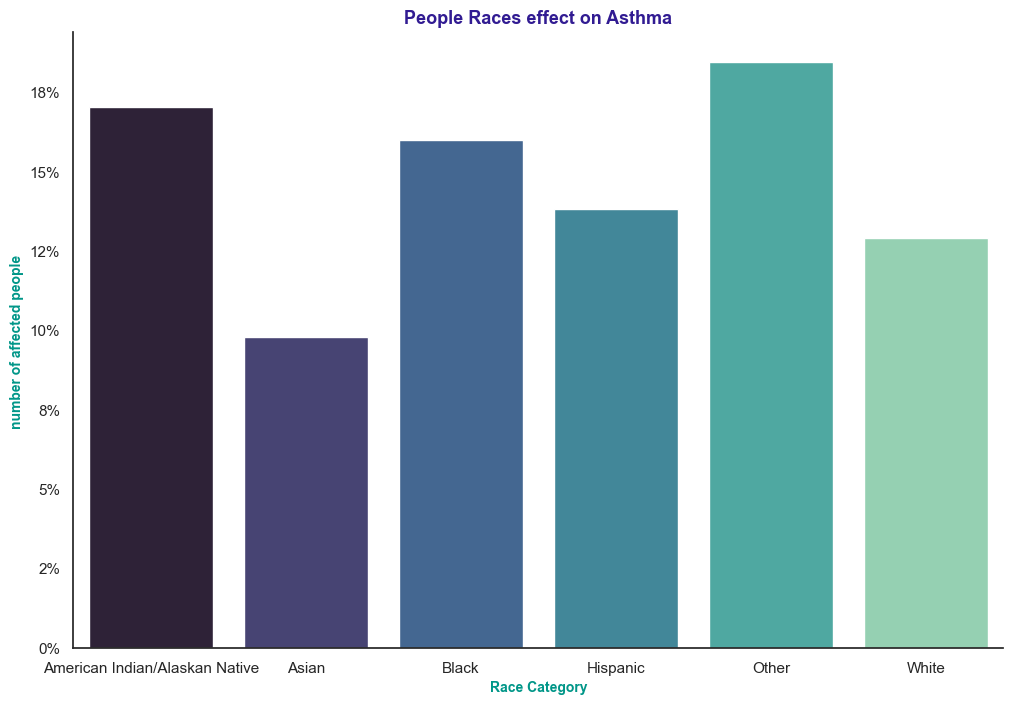

In [149]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'Race'
t = pd.DataFrame((ana_data[ana_data['Asthma']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
total2 = t['count'].sum()
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_title('People Races effect on Asthma', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Race Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of affected people ', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

# AlcoholDrinking

## Impact by Age

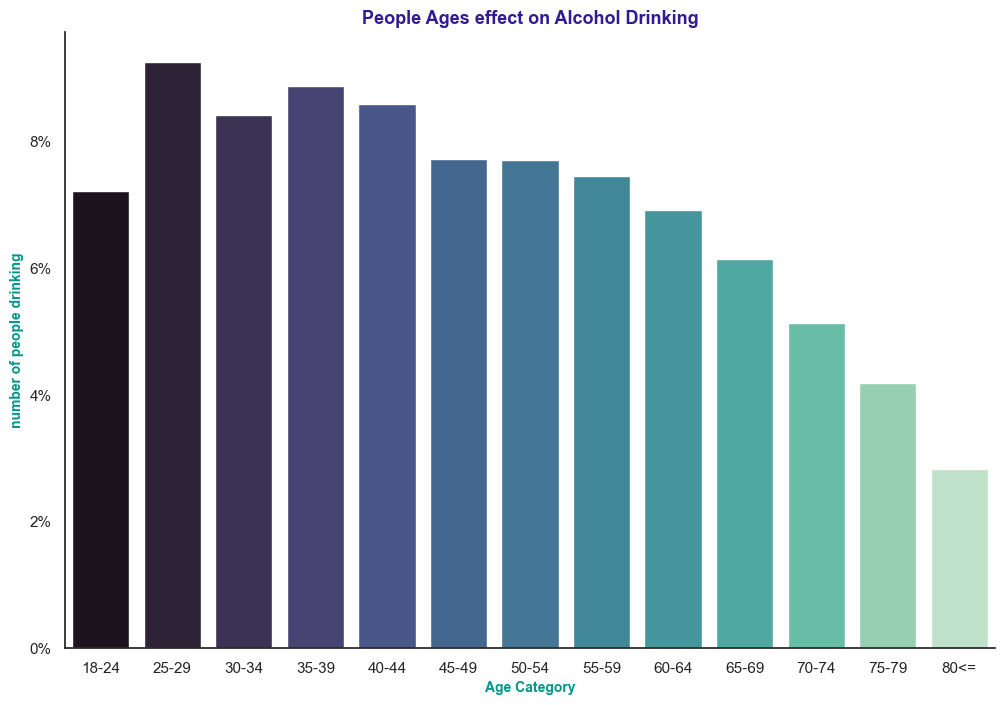

In [148]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'AgeCategory'
t = pd.DataFrame((ana_data[ana_data['AlcoholDrinking']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
total2 = t['count'].sum()
ax.set_title('People Ages effect on Alcohol Drinking', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Age Category', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people drinking', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by Mental Health

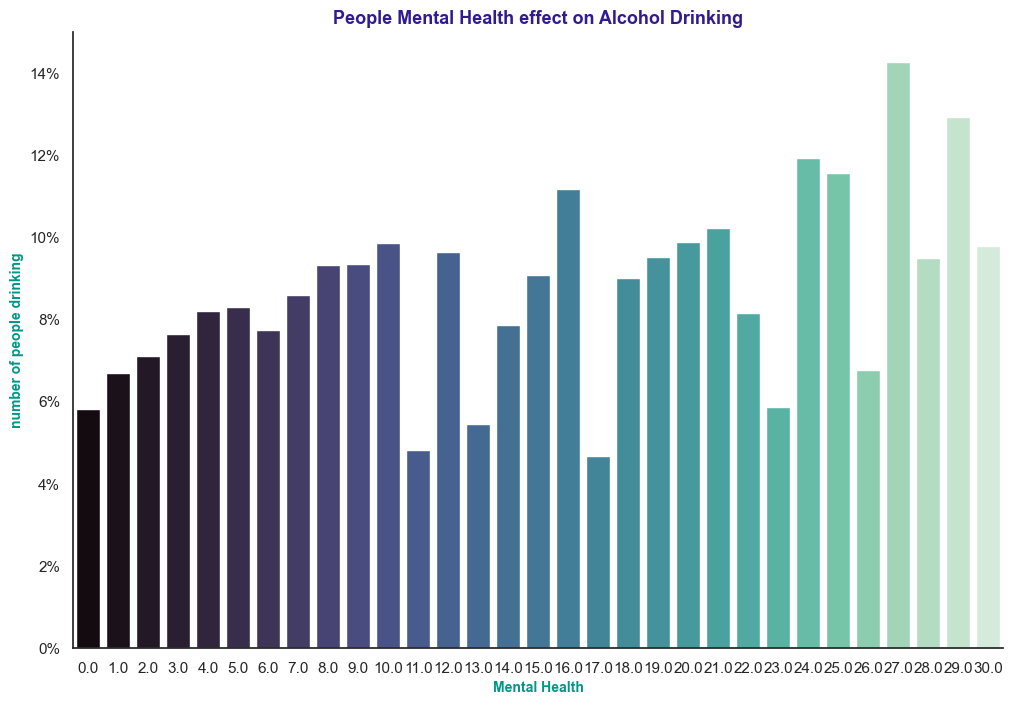

In [146]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'MentalHealth'
t = pd.DataFrame((ana_data[ana_data['AlcoholDrinking']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
total2 = t['count'].sum()
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_title('People Mental Health effect on Alcohol Drinking', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('Mental Health', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people drinking', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

## Impact by Gen Health

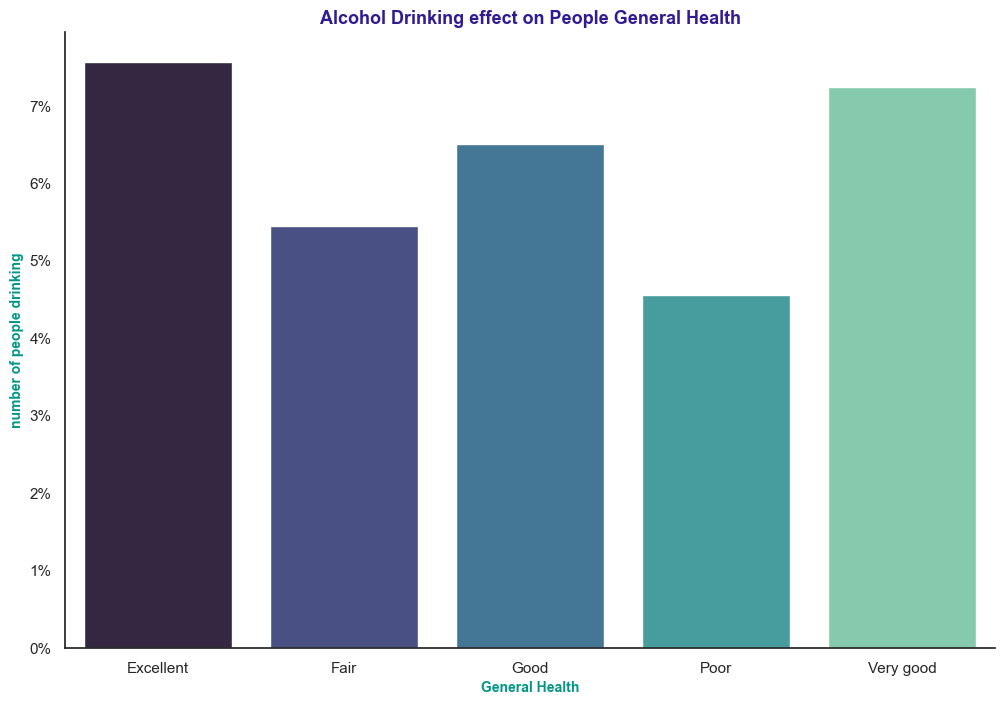

In [157]:
sns.set()
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,8))
col = 'GenHealth'
t = pd.DataFrame((ana_data[ana_data['AlcoholDrinking']== 'Yes'][col].value_counts() / ana_data[col].value_counts() * 100)).sort_values(col)
ax = sns.barplot(y=t['count'], x=t['count'].index, palette='mako')
total2 = t['count'].sum()
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_title('Alcohol Drinking effect on People General Health', loc='center', fontsize=13, fontweight='bold', fontdict={'color':'#311B92'})
ax.set_xlabel('General Health', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
ax.set_ylabel('number of people drinking', fontsize=10, fontweight='bold', fontdict={'color':'#009688'})
sns.despine()
plt.show()

# BMI

In [164]:
ana_data['BMI Category'] = ana_data['BMI'].apply(lambda x: 'Underweight' if x < 18.5 else ('Normal' if 18.5 <= x < 25 else ('Overweight' if 25 <= x < 30 else ('Obese' if 30 <= x < 35 else ('Severely Obese' if 35 <= x < 40 else ('Morbidly Obese'))))))

In [165]:
ana_data['BMI Category']

0            Underweight
1                 Normal
2             Overweight
3                 Normal
4                 Normal
               ...      
319790        Overweight
319791        Overweight
319792            Normal
319793             Obese
319794    Morbidly Obese
Name: BMI Category, Length: 319795, dtype: object

In [166]:
bc_cnt=ana_data['BMI Category'].value_counts()

In [167]:
bc_dist = pd.DataFrame(bc_cnt)

In [168]:
bc_dist['percentage'] = race_dist['count'].apply(lambda x: round((x/race_dist['count'].sum())*100),2)

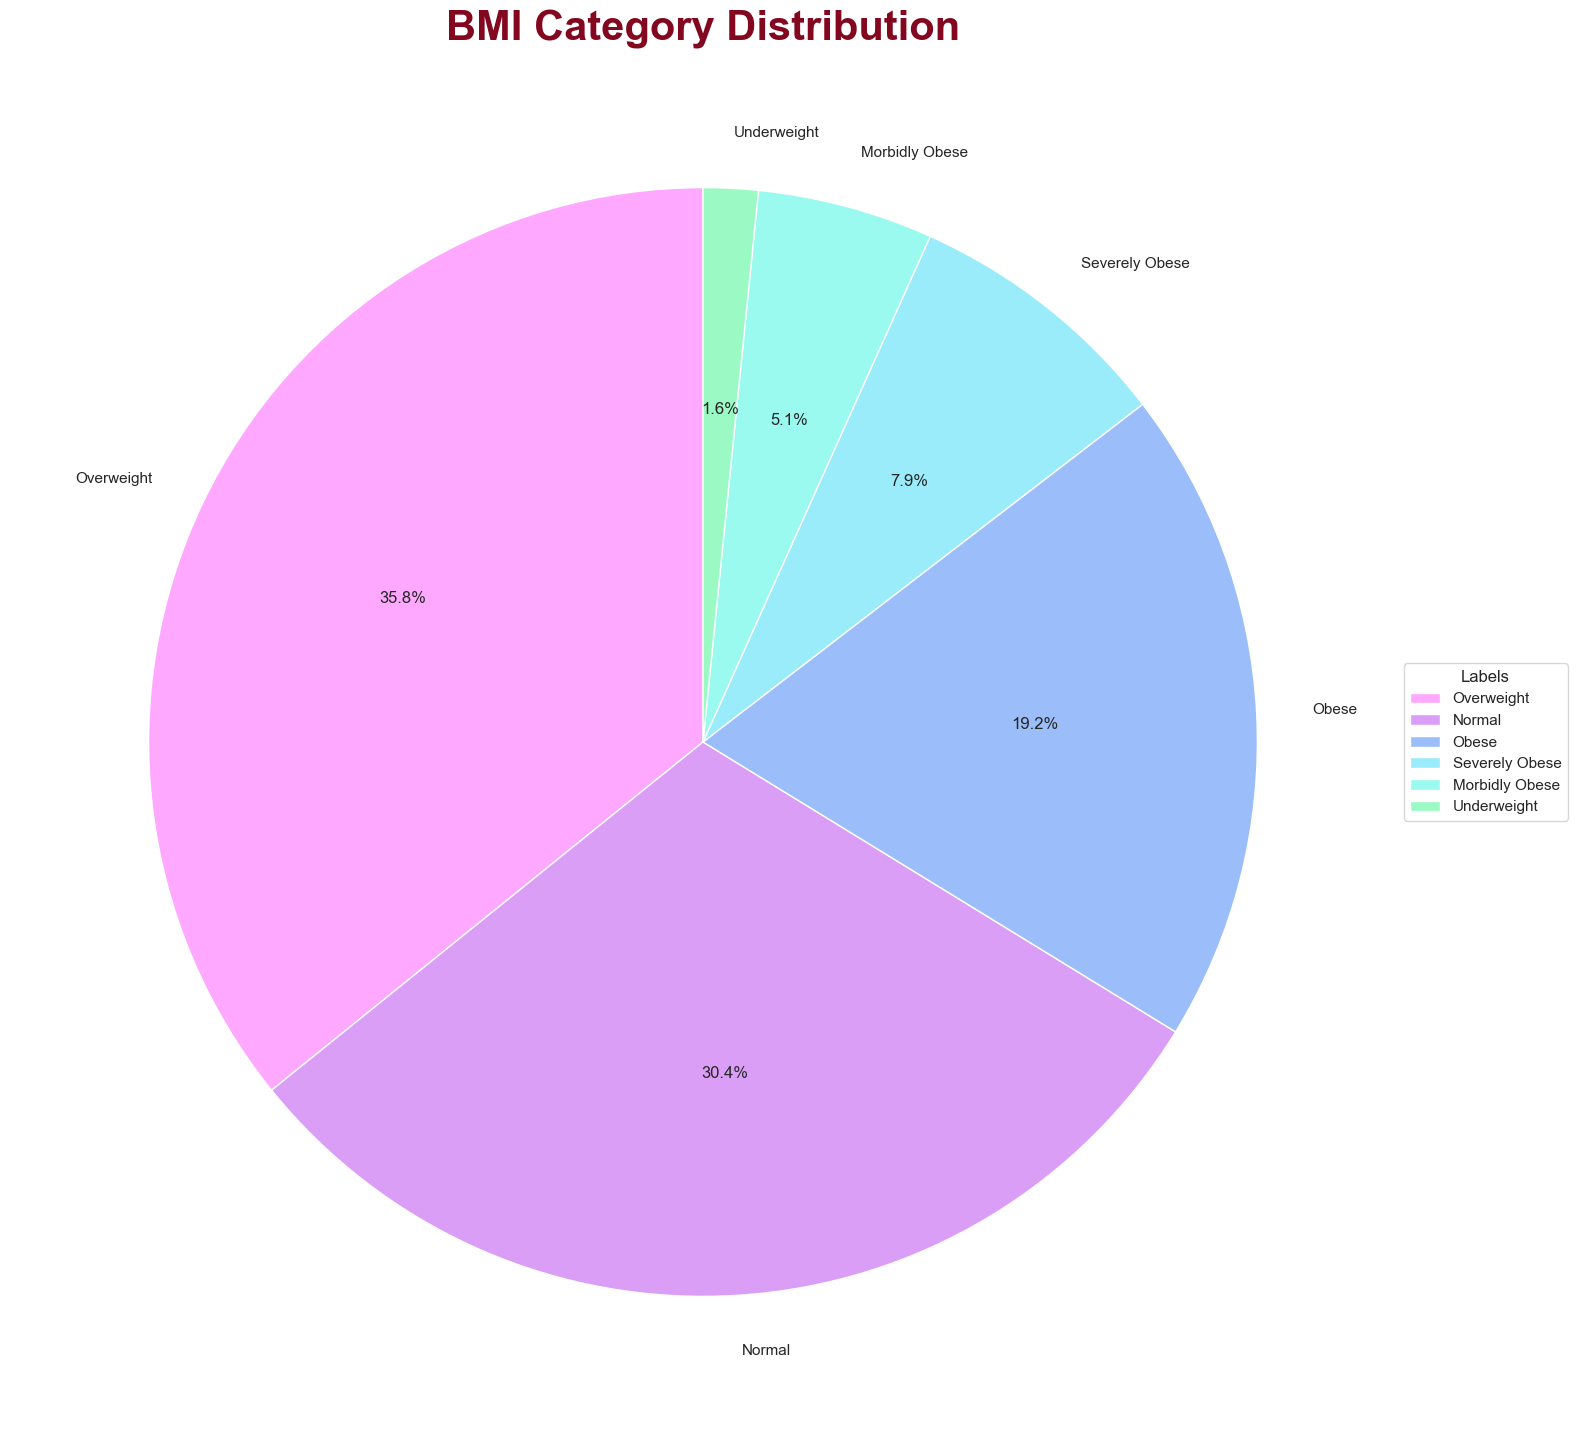

In [172]:
colors = ['#fea8ff','#db9ef7','#9bbefa','#9becfa','#9bfaf0','#9bfac3','#9dfa9b','#54c435','#dff09c','#f7f48f','#f2dc94','#f7ba74','#faa370']
fig, ax = plt.subplots(figsize=(18,18))
ax.pie(bc_dist['count'], labels=bc_dist.index, autopct='%1.1f%%', startangle=90 ,colors=colors)
ax.set_title('BMI Category Distribution' ,loc='center', fontsize=30, fontweight='bold', fontdict={'color':'#82071f'})
legend = ax.legend(title='Labels', loc='center left', bbox_to_anchor=(1, 0.5))
for i, label in enumerate(bc_dist.index):
    legend.get_texts()[i].set_text(label)
    legend.get_patches()[i].set_facecolor(colors[i])
plt.show()

## Impact by Physical Activity

In [189]:
list_bmi_cat = ana_data['BMI Category'].unique()

In [190]:
list_bmi_cat

array(['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly Obese',
       'Severely Obese'], dtype=object)

ValueError: Could not interpret input 'Underweight'

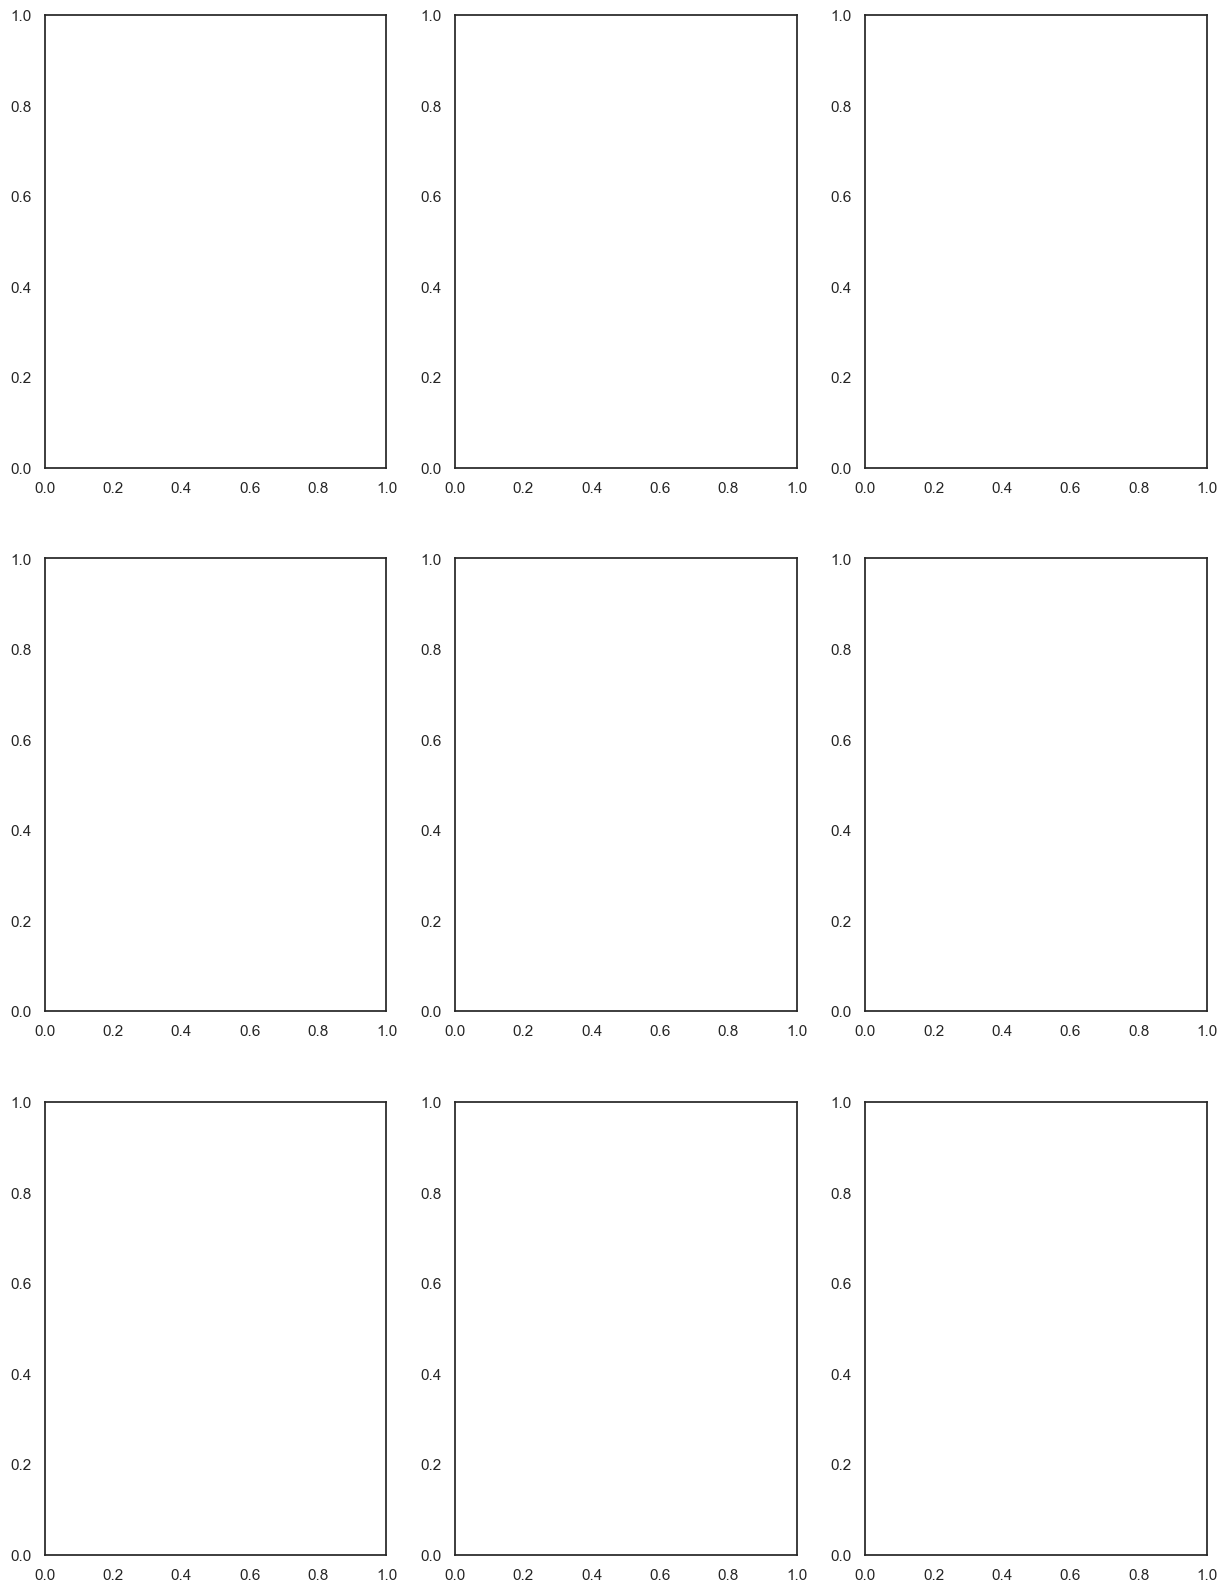

## Splitting data into train and test

In [251]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

11    15649
12    15995
13    16195
14    16199
15    16800
Name: car_price, dtype: int64

In [252]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.4 , random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.4, random_state = 42)
print(X_train.shape)
print(y_val.shape)


(138303, 15)
(92202,)


In [253]:
X_train.head()

,car_title,car_sub_title,car_attention_grabber,car_seller_location,year,reg,engine_size,transmission,fuel_type,car_type,miles_traveled,power,service,accident_type,finance
538074,1078,275,89951,1319,2018.0,11,0.9,1,2,6,0.9,0.9,0,4,1
140569,275,11290,9184,1289,2019.0,12,1.2,1,2,6,1.2,1.2,3,4,1
317707,709,33108,87416,1698,2019.0,12,1.6,1,2,10,1.6,1.6,3,4,0
680317,1391,39856,38636,210,2010.0,19,1.8,0,2,6,1.8,1.8,0,4,1
548833,1098,15927,33711,20,2020.0,13,1.3,1,2,10,1.3,1.3,0,4,1


# Training the model

Bulding function needed to get metrics for val set

In [254]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {r2_score(y_test,model.predict(X_test) )}')
    print("MAE:" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE:" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))
    



## Basic Linear Regression

In [255]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.6451796947379362
Val score 0.6452665842367873
MAE: 3594.4633826228824
MSE: 31224187.21346982
RMSE: 5587.860700972226


## Lasso

In [256]:
ls = Lasso()
ls.fit(X_train, y_train)
get_metrics(ls)

Train score 0.6451790731663016
Val score 0.6452666200820294
MAE: 3593.757557867542
MSE: 31224184.058315836
RMSE: 5587.860418650043


## Ridge

In [257]:
rd = Ridge()
rd.fit(X_train, y_train)
get_metrics(rd)

Train score 0.645179694555242
Val score 0.6452665981295045
MAE: 3594.4475648544703
MSE: 31224185.990611237
RMSE: 5587.860591551228


## Random forest

In [262]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=8,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.8120074573703373
Val score 0.8038968298777973
MAE: 2632.2732872460815
MSE: 17261306.16670699
RMSE: 4154.672811029406


## Keras model

In [263]:
from tensorflow import keras

Define the neural network model architecture

In [264]:

kr = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Compile the model with appropriate loss function and optimizer

In [265]:
# Compile the model with appropriate loss function and optimizer
kr.compile(loss='mean_squared_error', optimizer='adam')

Define a callback to show the progress (number of epoch)

In [266]:

class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

Train the model on the training data

In [ ]:

kr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

Use the trained model to make predictions on the testing data

In [ ]:

predictions = kr.predict(X_val)

In [ ]:
print(f'Train score {r2_score(y_train,kr.predict(X_train) )}')
print(f'Val score {r2_score(y_val, predictions)}')
print("MAE:" , metrics.mean_absolute_error(y_val,kr.predict(X_val)))
print("MSE:" , metrics.mean_squared_error(y_val,kr.predict(X_val)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,kr.predict(X_val))))